In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
# import KMeans
from sklearn.cluster import KMeans

In [41]:
df = pd.read_csv("./data/realKnownCause/nyc_taxi.csv")
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [42]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

<AxesSubplot:xlabel='timestamp'>

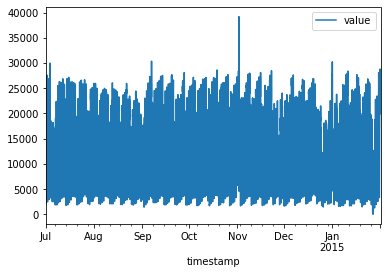

In [43]:
df.plot(x='timestamp', y='value')

<AxesSubplot:xlabel='timestamp'>

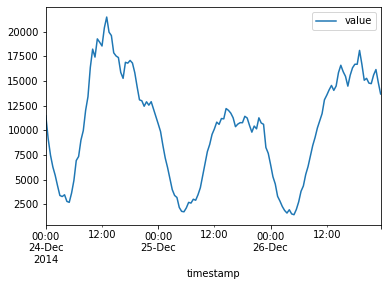

In [44]:
chrismas_df = df[(df['timestamp'].dt.month == 12) & (df['timestamp'].dt.day.isin((24,25,26)))]
chrismas_df.plot(x='timestamp', y='value')

In [45]:
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [46]:
df['hours'] = df['timestamp'].dt.hour
df['daylight'] = ((df['hours'] >= 7) & (df['hours'] <= 22)).astype(int)

In [47]:
df

,timestamp,value,hours,daylight
0,2014-07-01 00:00:00,10844,0,0
1,2014-07-01 00:30:00,8127,0,0
2,2014-07-01 01:00:00,6210,1,0
3,2014-07-01 01:30:00,4656,1,0
4,2014-07-01 02:00:00,3820,2,0
...,...,...,...,...
10315,2015-01-31 21:30:00,24670,21,1
10316,2015-01-31 22:00:00,25721,22,1
10317,2015-01-31 22:30:00,27309,22,1
10318,2015-01-31 23:00:00,26591,23,0


In [48]:
df['DayOfTheWeek'] = df['timestamp'].dt.dayofweek
df['WeekDay'] = (df['DayOfTheWeek'] < 5).astype(int)

In [49]:
df

,timestamp,value,hours,daylight,DayOfTheWeek,WeekDay
0,2014-07-01 00:00:00,10844,0,0,1,1
1,2014-07-01 00:30:00,8127,0,0,1,1
2,2014-07-01 01:00:00,6210,1,0,1,1
3,2014-07-01 01:30:00,4656,1,0,1,1
4,2014-07-01 02:00:00,3820,2,0,1,1
...,...,...,...,...,...,...
10315,2015-01-31 21:30:00,24670,21,1,5,0
10316,2015-01-31 22:00:00,25721,22,1,5,0
10317,2015-01-31 22:30:00,27309,22,1,5,0
10318,2015-01-31 23:00:00,26591,23,0,5,0


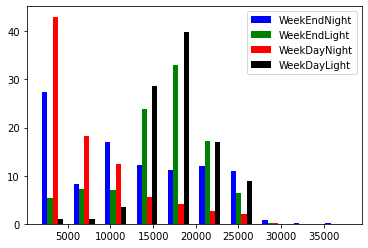

In [50]:
df['categories'] = df['WeekDay']*2 + df['daylight']

a = df.loc[df['categories'] == 0, 'value']
b = df.loc[df['categories'] == 1, 'value']
c = df.loc[df['categories'] == 2, 'value']
d = df.loc[df['categories'] == 3, 'value']

fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(a)
b_heights, b_bins = np.histogram(b, bins=a_bins)
c_heights, c_bins = np.histogram(c, bins=a_bins)
d_heights, d_bins = np.histogram(d, bins=a_bins)

width = (a_bins[1] - a_bins[0])/6

ax.bar(a_bins[:-1], a_heights*100/a.count(), width=width, facecolor='blue', label='WeekEndNight')
ax.bar(b_bins[:-1]+width, (b_heights*100/b.count()), width=width, facecolor='green', label ='WeekEndLight')
ax.bar(c_bins[:-1]+width*2, (c_heights*100/c.count()), width=width, facecolor='red', label ='WeekDayNight')
ax.bar(d_bins[:-1]+width*3, (d_heights*100/d.count()), width=width, facecolor='black', label ='WeekDayLight')

plt.legend()
plt.show()

In [51]:
# Take useful feature and standardize them
data = df[['value', 'hours', 'daylight', 'DayOfTheWeek', 'WeekDay']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
np_scaled

array([[-0.61874487, -1.66132477, -1.41421356, -1.00586515,  0.62936785],
       [-1.01029084, -1.66132477, -1.41421356, -1.00586515,  0.62936785],
       [-1.28654908, -1.51686175, -1.41421356, -1.00586515,  0.62936785],
       ...,
       [ 1.75402085,  1.51686175,  0.70710678,  1.00586515, -1.58889589],
       [ 1.65055011,  1.66132477, -1.41421356,  1.00586515, -1.58889589],
       [ 1.60688488,  1.66132477, -1.41421356,  1.00586515, -1.58889589]])

In [52]:
# reduce to 2 importants features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
data

array([[-4.29357609e+03,  8.60060672e+00],
       [-7.01057550e+03,  6.81836339e+00],
       [-8.92757443e+03,  4.56211232e+00],
       ...,
       [ 1.21714350e+04, -2.42307997e+00],
       [ 1.14534357e+04, -3.86749122e+00],
       [ 1.11504358e+04, -4.06624710e+00]])

In [67]:
# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
features = pd.DataFrame(np_scaled)
features

,0,1
0,-0.618746,1.649418
1,-1.010292,1.307621
2,-1.286550,0.874919
3,-1.510496,0.679426
4,-1.630971,0.382713
...,...,...
10315,1.373716,-0.605137
10316,1.525175,-0.664466
10317,1.754021,-0.464697
10318,1.650550,-0.741705


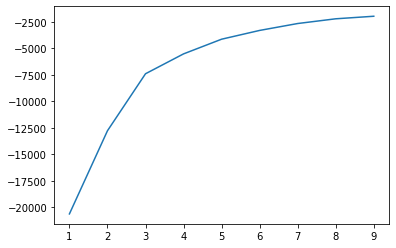

In [68]:
# calculate with different number of centroids to see the loss plot (elbow method)
n_cluster = range(1,10)
kmeans = [KMeans(n_clusters=i).fit(features) for i in n_cluster]
scores = [kmeans[i].score(features) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [69]:
kmeans[7].predict(features)

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

In [70]:
features[0]

0       -0.618746
1       -1.010292
2       -1.286550
3       -1.510496
4       -1.630971
           ...   
10315    1.373716
10316    1.525175
10317    1.754021
10318    1.650550
10319    1.606885
Name: 0, Length: 10320, dtype: float64

In [71]:
features[1]

0        1.649418
1        1.307621
2        0.874919
3        0.679426
4        0.382713
           ...   
10315   -0.605137
10316   -0.664466
10317   -0.464697
10318   -0.741705
10319   -0.779822
Name: 1, Length: 10320, dtype: float64

In [72]:
df['cluster'] = kmeans[7].predict(features)
df['principal_feature1'] = features[0]
df['principal_feature2'] = features[1]
df['cluster'].value_counts()

7    2092
1    2056
5    1666
3    1454
4    1264
0     914
6     480
2     394
Name: cluster, dtype: int64

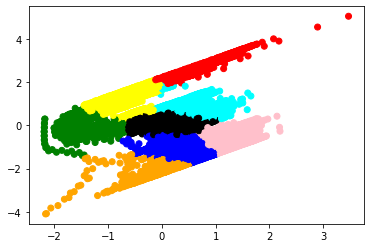

In [62]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}
ax.scatter(df['princ    ipal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))
plt.show()

In [73]:
from pyemma import msm

def anomalyElement(sequence, real_threshold, transition_matrix):
    # get the distance of each element from the centroid
    distance = getDistanceByPoint(sequence, transition_matrix)
    # get the threshold of each element
    threshold = real_threshold.loc[sequence.index]
    # get the anomaly element
    anomaly = distance[distance > threshold]
    return anomaly

def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i]=np.linalg.norm(Xa-Xb)
        #distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

# train markov model to get transition matrix
def getTransitionMatrix (df):
	df = np.array(df)
	model = msm.estimate_markov_model(df, 1)
	return model.transition_matrix

def markovAnomaly(df, windows_size, threshold):
    transition_matrix = getTransitionMatrix(df)
    real_threshold = threshold**windows_size
    df_anomaly = []
    for j in range(0, len(df)):
        if (j < windows_size):
            df_anomaly.append(0)
        else:
            sequence = df[j-windows_size:j]
            sequence = sequence.reset_index(drop=True)
            df_anomaly.append(anomalyElement(sequence, real_threshold, transition_matrix))
    return df_anomaly

In [74]:
distance = getDistanceByPoint(data, kmeans[7])
distance

/var/folders/84/6vx8lc2j0qx9grccw3440b6r0000gq/T/ipykernel_7089/4136123788.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  distance = pd.Series()


0        1.953982
1        1.474782
2        0.973522
3        3.111617
4        2.901752
           ...   
10315    1.730958
10316    1.858890
10317    1.835643
10318    1.991950
10319    2.000039
Length: 10320, dtype: float64

In [89]:
len(distance)

10320

In [91]:
outliers_fraction = 0.005

number_of_outliers = int(outliers_fraction*len(distance))
number_of_outliers

51

In [92]:
distance.nlargest(number_of_outliers)

5954     5.954446
5955     5.227087
10079    4.964812
10078    4.944246
10077    4.701746
8926     4.545275
2062     4.543095
3406     4.542960
4078     4.533829
4126     4.530889
10076    4.526783
1103     4.506780
1726     4.503485
2831     4.496066
3068     4.495280
5758     4.492842
8637     4.491682
2446     4.487988
7774     4.483287
3357     4.482792
4364     4.482239
431      4.470339
2348     4.468432
7246     4.468044
6045     4.466778
9214     4.463220
4029     4.461406
7101     4.459857
5709     4.458791
8927     4.454379
1439     4.441048
2733     4.440181
4651     4.435747
2924     4.434834
2926     4.434008
2012     4.432037
6766     4.427859
8636     4.426825
6716     4.421378
7823     4.419155
8781     4.418811
1626     4.412155
7100     4.410754
4988     4.406949
7001     4.405655
2683     4.404789
9066     4.402661
617      4.401642
1054     4.399592
1291     4.393523
1005     4.393347
dtype: float64

In [93]:
threshold = distance.nlargest(number_of_outliers).min()
threshold

4.3933471035673275

In [94]:
# anomaly21 contain the anomaly result of method 2.1 Cluster (0:normal, 1:anomaly) 
df['anomaly21'] = (distance >= threshold).astype(int)

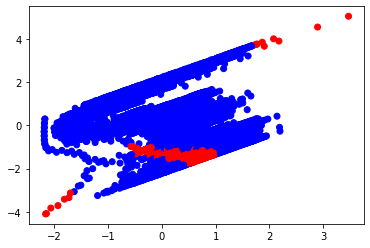

In [86]:
# visualisation of anomaly with cluster view
fig, ax = plt.subplots()
colors = {0:'blue', 1:'red'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomaly21"].apply(lambda x: colors[x]))
plt.show()

In [96]:
df[df['anomaly21'] == 1]

,timestamp,value,hours,daylight,DayOfTheWeek,WeekDay,categories,cluster,principal_feature1,principal_feature2,anomaly21
431,2014-07-09 23:30:00,19338,23,0,2,1,2,3,0.605323,-1.679509,1
617,2014-07-13 20:30:00,15566,20,1,6,0,1,3,0.061742,-1.550817,1
1005,2014-07-21 22:30:00,18642,22,1,0,1,3,3,0.505023,-1.596491,1
1054,2014-07-22 23:00:00,19939,23,0,1,1,2,3,0.691933,-1.611959,1
1103,2014-07-23 23:30:00,19064,23,0,2,1,2,3,0.565837,-1.713978,1
1291,2014-07-27 21:30:00,16920,21,1,6,0,1,3,0.256866,-1.572029,1
1439,2014-07-30 23:30:00,19560,23,0,2,1,2,3,0.637316,-1.651582,1
1626,2014-08-03 21:00:00,16790,21,1,6,0,1,3,0.238132,-1.588383,1
1726,2014-08-05 23:00:00,19149,23,0,1,1,2,3,0.578087,-1.711340,1
2012,2014-08-11 22:00:00,18358,22,1,0,1,3,3,0.464096,-1.632219,1
